In [1]:
import sys
print(sys.executable)
print(sys.version)

/usr/bin/python3
3.5.3 (default, Sep 27 2018, 17:25:39) 
[GCC 6.3.0 20170516]


In [2]:
import base64

In [3]:
import collections
d = collections.deque(maxlen=10)

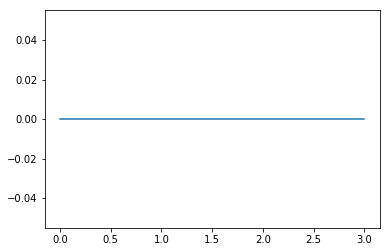

In [10]:
plt.plot([0,0,0,0])

In [4]:
import matplotlib.pyplot as plt 
import os
os.getcwd()

'/home/pi/CODE/home_automation'

In [5]:
import RPi.GPIO as GPIO
import time
import os
import datetime
import numpy as np
# import seaborn as sns
import pickle
# GPIO.setwarnings(False)

In [6]:
# !pip install seaborn

In [7]:
# !sudo dtoverlay w1-gpio gpiopin=6 pullup=0 # header pin 7

In [8]:
def wireless_ini():
    GPIO.cleanup()
    # set the pins numbering mode
    GPIO.setmode(GPIO.BOARD)
    # Select the GPIO pins used for the encoder K0-K3 data inputs
    GPIO.setup(11, GPIO.OUT)
    GPIO.setup(15, GPIO.OUT)
    GPIO.setup(16, GPIO.OUT)
    GPIO.setup(13, GPIO.OUT)
    # Select the signal used to select ASK/FSK
    GPIO.setup(18, GPIO.OUT)
    # Select the signal used to enable/disable the modulator
    GPIO.setup(22, GPIO.OUT)
    # Disable the modulator by setting CE pin lo
    GPIO.output (22, False)
    # Set the modulator to ASK for On Off Keying
    # by setting MODSEL pin lo
    GPIO.output (18, False)
    # Initialise K0-K3 inputs of the encoder to 0000
    GPIO.output (11, False)
    GPIO.output (15, False)
    GPIO.output (16, False)
    GPIO.output (13, False)
    
def wireless_one():
    print('turning on radiator')
    GPIO.output (11, True)
    GPIO.output (15, True)
    GPIO.output (16, True)
    GPIO.output (13, True)
    # let it settle, encoder requires this
    time.sleep(0.1)
    # Enable the modulator
    GPIO.output (22, True)
    # keep enabled for a period
    time.sleep(0.25)
    # Disable the modulator
    GPIO.output (22, False)
    GPIO.cleanup()

In [40]:
def wireless_one_off():
    print ("sending code 0111 Socket 1 off")
    GPIO.output (11, True)
    GPIO.output (15, True)
    GPIO.output (16, True)
    GPIO.output (13, False)
    # let it settle, encoder requires this
    time.sleep(0.1)
    # Enable the modulator
    GPIO.output (22, True)
    # keep enabled for a period
    time.sleep(0.25)
    # Disable the modulator
    GPIO.output (22, False)
    GPIO.cleanup()

In [61]:
wireless_ini()
wireless_one()


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: No channels have been set up yet - nothing to clean up!  Try cleaning up at the end of your program instead!
  


turning on radiator


In [60]:
wireless_ini()
wireless_one_off()

sending code 0111 Socket 1 off


In [43]:
temp_loc = '/sys/bus/w1/devices/'
device = '28-0213924576ef/'

In [44]:
def temp_ini():
    GPIO.cleanup()
    GPIO.setmode(GPIO.BCM)
    GPIO.setup(21, GPIO.OUT)
    GPIO.output(21,1)

    os.system('modprobe w1-gpio')
    os.system('modprobe w1-therm')

#     temp_loc = '/sys/bus/w1/devices/'
    #########
#     os.chdir(temp_loc)
#     print(os.listdir())
##############
#     device = '28-0213924576ef/'
#     os.chdir(temp_loc+device)
#     print(os.getcwd())
    
temp_ini()    

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: No channels have been set up yet - nothing to clean up!  Try cleaning up at the end of your program instead!
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: This channel is already in use, continuing anyway.  Use GPIO.setwarnings(False) to disable warnings.
  after removing the cwd from sys.path.


In [45]:
def temp_raw():
    temp_sensor = temp_loc+device+'w1_slave'
    f=open(temp_sensor,'r')
    lines = f.readlines()
    f.close()
    return lines

def read_temp():
    temp_ini()
    lines=temp_raw()
    while lines[0].strip()[-3:]!='YES':
        time.sleep(0.2)
        lines = temp_raw()
    temp_output = lines[1].find('t=')
    if temp_output != -1:
        temp_string = lines[1].strip()[temp_output+2:]
        temp_c = float(temp_string)/1000.0
        return temp_c
    

In [62]:
# temp_ini()
read_temp()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: No channels have been set up yet - nothing to clean up!  Try cleaning up at the end of your program instead!
  


17.625

In [63]:
temps = []
trigger_block = False
block_time = datetime.datetime.now().time() #ini
t = datetime.datetime.now().time()
print('entering loop')
while True:
    t = datetime.datetime.now().time()
    curr = read_temp()
    print(t, curr)
    temps = temps + [(t,curr)]
    
    if (curr <= 17.0)  & (t.hour < 9) & (trigger_block == False):
        trigger_block = True  
        wireless_ini()
        wireless_one()
    elif (curr>17.5)& (trigger_block == True):
        wireless_ini()
        wireless_one_off()
        trigger_block = False
    
    time.sleep(60)

entering loop
01:03:01.183923 17.687
01:06:04.234350 17.625
01:07:05.274133 17.687
01:08:06.314204 17.75
01:09:07.354204 17.562
01:10:08.393975 17.437
01:11:09.434150 17.687
01:12:10.474226 17.75
01:13:11.514103 17.687
01:14:12.554179 17.625
01:15:13.594071 17.75
01:16:14.633930 17.75
01:17:15.655341 17.625
01:18:16.695199 17.687
01:19:17.753952 17.625
01:20:18.793973 17.687
01:21:19.824642 17.687
01:22:20.873919 17.625
01:23:21.895213 17.687
01:24:22.925218 17.5
01:25:23.913904 17.562
01:26:24.954082 17.625
01:27:25.993992 17.5
01:28:27.015204 17.562
01:29:28.074357 17.437
01:30:29.114079 17.5
01:31:30.136772 17.5
01:32:31.194014 17.5
01:33:32.234003 17.25
01:34:33.274003 17.437
01:35:34.313972 17.375
01:36:35.353998 17.25
01:37:36.393879 17.375
01:38:37.387016 17.375
01:39:38.373287 17.25
01:40:39.433885 17.312
01:41:40.473933 17.25
01:42:41.513913 17.437
01:43:42.553892 17.187
01:44:43.593967 17.312
01:45:44.636241 17.187
01:46:45.674107 17.375
01:47:46.716733 17.25
01:48:47.754573 

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: No channels have been set up yet - nothing to clean up!  Try cleaning up at the end of your program instead!
  


02:09:08.825205 17.062
02:10:09.838691 16.875
02:11:10.835202 17.062
02:12:11.815206 17.0
02:13:12.874176 17.062
02:14:13.914300 17.0
02:15:14.954097 17.0
02:16:15.994158 17.0
02:17:17.034042 17.0
02:18:18.073959 17.0
02:19:19.114152 16.875
02:20:20.148665 16.875
02:21:21.194140 17.0
02:22:22.234104 16.937
02:23:23.274016 16.875
02:24:24.314060 17.0
02:25:25.353999 17.0
02:26:26.394005 17.0
02:27:27.434046 17.0
02:28:28.455207 16.812
02:29:29.495208 17.0
02:30:30.554066 16.937
02:31:31.594076 16.875
02:32:32.615424 17.0
02:33:33.674024 17.0
02:34:34.714078 16.937
02:35:35.754203 17.062
02:36:36.794176 17.062
02:37:37.834490 16.812
02:38:38.874151 17.0
02:39:39.914154 17.062
02:40:40.954126 17.0
02:41:41.993894 16.875
02:42:43.033988 17.0
02:43:44.073995 16.937
02:44:45.114062 16.875
02:45:46.153960 16.937
02:46:47.194001 16.75
02:47:48.233940 17.0
02:48:49.273988 17.0
02:49:50.313889 16.875
02:50:51.353924 16.937
02:51:52.337066 16.937
02:52:53.353957 17.0
02:53:54.393891 16.875
02:54:

KeyboardInterrupt: 

In [115]:
temps

[(datetime.time(1, 24, 18, 365879), 17.625),
 (datetime.time(1, 25, 19, 380775), 17.625),
 (datetime.time(1, 26, 20, 412834), 17.5),
 (datetime.time(1, 27, 21, 433903), 17.687),
 (datetime.time(1, 28, 22, 492833), 17.562),
 (datetime.time(1, 29, 23, 532724), 17.5),
 (datetime.time(1, 30, 24, 572772), 17.562),
 (datetime.time(1, 31, 25, 612842), 17.5),
 (datetime.time(1, 32, 26, 652808), 17.437),
 (datetime.time(1, 33, 27, 699204), 17.687),
 (datetime.time(1, 34, 28, 732864), 17.562),
 (datetime.time(1, 35, 29, 753922), 17.625),
 (datetime.time(1, 36, 30, 812721), 17.5),
 (datetime.time(1, 37, 31, 833916), 17.437),
 (datetime.time(1, 38, 32, 898144), 17.625),
 (datetime.time(1, 39, 33, 932857), 17.5),
 (datetime.time(1, 40, 34, 972730), 17.5),
 (datetime.time(1, 41, 36, 12836), 17.562),
 (datetime.time(1, 42, 37, 52654), 17.437),
 (datetime.time(1, 43, 38, 73929), 17.5),
 (datetime.time(1, 44, 39, 132859), 17.562),
 (datetime.time(1, 45, 40, 143898), 17.5),
 (datetime.time(1, 46, 41, 21

In [21]:
t.hour

1

In [27]:
temps = []

In [29]:
temps = temps + [1]

In [30]:
temps

[1]

In [67]:
import matplotlib.pyplot as plt 

In [116]:
te = [i[1] for i in temps]

In [72]:
ti = [i[0] for i in temps]

In [76]:
import matplotlib.dates as dates

In [92]:
my_day = datetime.date(2019, 1, 5)
x_dt = [ dates.date2num(datetime.datetime.combine(my_day, t)) for t in ti ]

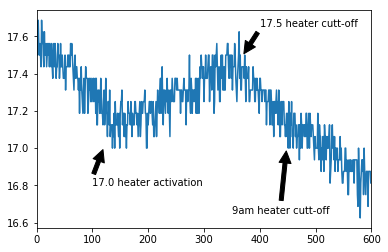

In [134]:
plt.plot(te)
plt.annotate('17.0 heater activation',xy = (120,17), xytext = (100, 16.8),arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('17.5 heater cutt-off',xy = (370,17.5), xytext = (400, 17.65),arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('9am heater cutt-off',xy = (448,17.0), xytext = (350, 16.65),arrowprops=dict(facecolor='black', shrink=0.05))
plt.xlim(0,600)
plt.show()

In [132]:
temps[600]

(datetime.time(11, 34, 39, 533068), 16.875)

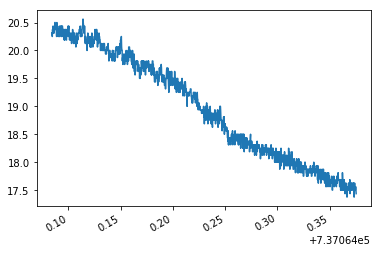

In [97]:
plt.plot(x_dt, te)
plt.gcf().autofmt_xdate()
plt.show()

In [96]:
x_dt

[737064.0843145447,
 737064.0845570872,
 737064.0847996824,
 737064.0850422753,
 737064.085284867,
 737064.0855274607,
 737064.085770052,
 737064.0860126461,
 737064.0862552399,
 737064.0864978321,
 737064.0867404254,
 737064.0869830169,
 737064.0872256097,
 737064.0874682033,
 737064.0877107951,
 737064.0879533873,
 737064.0881959811,
 737064.0884385728,
 737064.088681165,
 737064.0889238205,
 737064.0891664139,
 737064.0894090055,
 737064.0896515991,
 737064.0898942304,
 737064.0901367845,
 737064.0903793484,
 737064.090621966,
 737064.0908644975,
 737064.0911070906,
 737064.0913496831,
 737064.091592276,
 737064.0918348678,
 737064.0920774617,
 737064.0923200542,
 737064.0925626467,
 737064.0928052386,
 737064.0930478309,
 737064.0932904243,
 737064.0935330169,
 737064.0937756107,
 737064.0940182041,
 737064.0942608567,
 737064.0945033878,
 737064.0947459807,
 737064.0949885729,
 737064.0952312304,
 737064.0954737581,
 737064.0957163513,
 737064.09595901,
 737064.0962024615,
 737064

In [110]:
# !sudo touch 190104to05temp_data.pkl

# pickle.dump(temps,open('190104to05temp_data.pkl', 'wb'))

PermissionError: [Errno 13] Permission denied: '190104to05temp_data.pkl'

In [21]:
from flask import Flask
from flask_ask import Ask, statement, convert_errors
import RPi.GPIO as GPIO
import logging
import serial
import time

In [24]:
app = Flask(__name__)

ask = Ask(app, '/')

logging.getLogger("flask_ask").setLevel(logging.DEBUG)

@ask.intent('temperature')

def temperature():
    x = 20
#   x = 'The temperature is %d'%read_temp()

    return statement(x)


app.run(host='0.0.0.0', port=8080, debug=True)

 * Running on http://0.0.0.0:8080/ (Press CTRL+C to quit)
 * Restarting with stat


SystemExit: 1

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:3275: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [48]:
def web_page(im_tag): 
    page= """

    <html>
    <head>
    <style>
    body {
            color: red;
    }
    </style>
    <body bgcolor="#000000">
        <head>
            <title>Temperature Plot</title>
        </head>
        <body>
            <h1>"""+ str_format()+""" </h1> 
            """ + im_tag + """
            
        </body>
    </html>


    """
    return page

In [49]:
def str_format():
    t = datetime.datetime.now().time()
    return "The time is %d:%d and the temperature is...  %d degrees"%(t.hour, t.minute, read_temp())

In [50]:
from flask import Flask
app = Flask(__name__)

@app.route('/')
def hello_world():
    data_uri = base64.b64encode(open('graph.png', 'rb').read()).decode('utf-8').replace('\n', '')
    img_tag = '<img src="data:image/png;base64,{0}">'.format(data_uri)
    return web_page(img_tag) #str_format()

app.run(host='0.0.0.0', port=8080)

 * Running on http://0.0.0.0:8080/ (Press CTRL+C to quit)
192.168.1.24 - - [27/Jan/2019 23:51:13] "GET / HTTP/1.1" 200 -


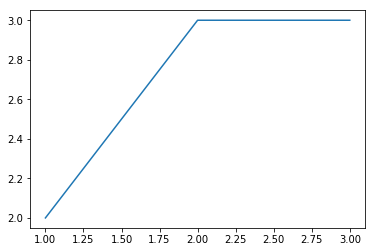

In [17]:
plt.plot([1,2,3], [2,3,3])
plt.savefig('graph.png')



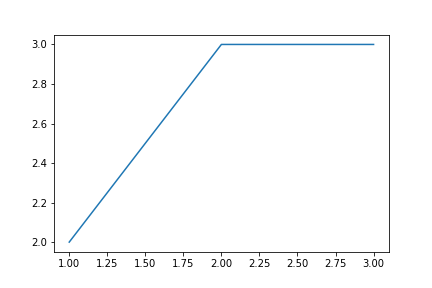

In [25]:


print(img_tag)